<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/Completed_4_Competitor_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 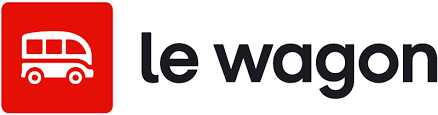

# Get competitor's products and prices info

Naturalia is a health food French company, and one of the main competitors of Greenweez.

In this challenge, you will gather information on Naturalia products to help Greenweez drive its pricing strategy.

## Naturalia website

### BeautifulSoup


Go to the [website](https://www.naturalia.fr/catalogsearch/result/?q=compote) and study the url. What is the endpoint? What is the query parameter ?

Endpoint: https://www.naturalia.fr/catalogsearch/result/
Query parameter: https://www.naturalia.fr/catalogsearch/result/?q=compote where q is the key and compote is the value.


Using `requests` and `bs4`libraries, convert the html code to a BeautifulSoup object and store it in a `soup`variable.

Have a look at the lecture if you're unsure about the syntax.

In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://www.naturalia.fr/catalogsearch/result/?q=compote"

response = requests.get(url)

if response.status_code == 200:

    soup = BeautifulSoup(response.content, "html.parser")

    print(soup)
else:

    print(f"Error: Unable to fetch content from {url}")


<!DOCTYPE html>

<html lang="fr">
<head>
<script>
    var LOCALE = 'fr\u002DFR';
    var BASE_URL = 'https\u003A\u002F\u002Fwww.naturalia.fr\u002F';
    var require = {
        'baseUrl': 'https\u003A\u002F\u002Fstatic.naturalia.fr\u002Fstatic\u002Fversion1713249715\u002Ffrontend\u002FNaturalia\u002Fdefault\u002Ffr_FR'
    };</script> <meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.eu01.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-ee3a145d51e9eb355e7",applicationID:"95760541"};;/*! For license information please see nr-loader-rum-1.257.0.min.js.LICENSE.txt */
(()=>{var e,t,r={234:(e,t,r)=>{"use strict";r.d(t,{P_:()=>v,Mt:()=>b,C5:()=>s,OP:()=>S,lF:()=>N,Yu:()=>_,Dg:()=>m,CX:()=>c,GE:()=>w,sU:()=>k});var n=r(8632),i=r(9567);const o={beacon:n.ce.beacon,errorBeacon:n.ce.errorBeacon,licenseKey:void 0,applicationID:void 0,sa:void 0,queueTime:void 0,applicationTime:void 0,ttGuid:void 0,user:void 0,acco

### Investigating the page layout


We want to get information about all the products displayed on the page.

By examining the website's HTML code, determine the HTML tag that contains information for each product.

li tag


Use BeautifulSoup's `find_all()` method to retrieve all **li** tags with the class **item product product-item** and store the results in a variable named `items`.

Have a look at the lecture for guidance.

In [7]:
items = soup.find_all("li", class_="item product product-item")

print("Number of items found:", len(items))




Number of items found: 24


What is the type of `items`?


List: Each element in this list is a BeautifulSoup Tag object representing an HTML tag. So items will be a list of Tag objects, with each Tag object representing a li tag


### Scraping one product information


Store the first item in a variable named `item`.

In [8]:
item = items[0]

print(item)


<li class="item product product-item"> <div class="product-item-info" data-container="product-grid">
<p class="product name product-item-name">
<a class="product-item-link" href="https://www.naturalia.fr/produit/compot-pomme-chataigne-4x100g">
                                    Compote de pomme &amp; châtaigne 4x100G Bio							</a>
</p>
<p class="product-item-brand">Danival</p>
<div class="product-item-photo">
<a class="product photo" href="https://www.naturalia.fr/produit/compot-pomme-chataigne-4x100g" tabindex="-1">
<span class="product-image-container product-image-container-52783">
<span class="product-image-wrapper">
<img alt="Compote de pomme &amp; châtaigne 4x100G Bio" class="product-image-photo" height="233" loading="lazy" src="https://media.naturalia.fr/media/catalog/product/cache/c97961dbe2ef8ae9072b778469b58f9a/3/4/3431590014080.jpg" width="233"/></span>
</span>
<style>.product-image-container-52783 {
    width: 233px;
}
.product-image-container-52783 span.product-image-wra

HTML can be tough to decipher when reading it in the notebook.

Use your browser's console to identify the HTML tag storing the product information (name and url) of the first item. \
Extract it with BeautifulSoup and store the results in a variable named `item_description`.

In [10]:
item_description = item.find("a").text

print(item_description)


                                    Compote de pomme & châtaigne 4x100G Bio							


Now extract the name and url from `item_description`and store them in two variables named `item_name` and `item_url`.


In [16]:
a_tag = item.find("a")

item_name = a_tag.text.strip()

item_url = a_tag.get("href")

print("Item Name:", item_name)
print("Item URL:", item_url)



Item Name: Compote de pomme & châtaigne 4x100G Bio
Item URL: https://www.naturalia.fr/produit/compot-pomme-chataigne-4x100g


In [19]:
stored_item_url = item_url

print("Stored Item URL:", stored_item_url)



Stored Item URL: https://www.naturalia.fr/produit/compot-pomme-chataigne-4x100g


Repeat the same process to extract the price of the first item, and store it in a variable named `item_price`.


<details>
    <summary>Hint 🔍</summary>

You will be required to do some cleaning with the output, including:
    
- get rid of the unnecessary characters (`strip()`and `replace()` methods can help)
- change the data type

</details>

In [21]:
price_tag = item.find("span", class_="price")

item_price_text = price_tag.text.strip()

item_price = float(item_price_text.replace("€", "").replace(",", "."))

print("Item Price:", item_price)


Item Price: 5.25


### Scraping all products information

We will now repeat the process to gather the information of all the products displayed on the page.

By re-using your previous code, iterate over all the products and create a list of dictionaries containg all the products information (product name, price and url).

Complete the following code and execute it.

In [26]:
import pandas as pd

products = []

for item in items:

    item_description_tag = item.find("h2", class_="product-name")
    if item_description_tag:
        item_description = item_description_tag.text.strip()
    else:
        item_description = "No Description Available"

    item_url_tag = item.find("a", class_="product-item-link")
    if item_url_tag:
        item_url = item_url_tag["href"].strip()
    else:
        item_url = "No URL Available"

        price_tag = item.find("span", class_="price")
    if price_tag:
        item_price_text = price_tag.text.strip()
        item_price = float(item_price_text.replace("€", "").replace(",", "."))
    else:
        item_price = 0.0

    product_info = {
        "name": item_description,
        "price": item_price,
        "url": item_url
    }

    products.append(product_info)

df = pd.DataFrame(products)


Congratulations! You just scraped your first web page using Python! 🤖

---

Did we scrape all the products though ?


 We have only scraped only the products displayed on the current page.


### Scraping all the pages

Use your web browser inspector to identify the HTML tag containing the URL for the next page. \
Store this in a variable named `next_page_item`

In [30]:
next_page_item = soup.find("a",{"class":"action next"})
next_page_item


<a class="action next" href="https://www.naturalia.fr/catalogsearch/result/index/?p=2&amp;q=compote" title="Suivant">
<i aria-hidden="true" class="fa fa-chevron-circle-right"></i>
</a>

Now extract the URL from it and store it in a variable named `next_page_url`.

In [33]:
next_page_url = next_page_item['href']

print(next_page_url)


https://www.naturalia.fr/catalogsearch/result/index/?p=2&q=compote


Now try to repeat the `next_page_item`instructions **on the last page**. Does it work ?

In [35]:
# Check if next_page_item exists
if next_page_item:
    # Extract the URL of the next page
    next_page_url = next_page_item['href']
    print("Next Page URL:", next_page_url)
else:
    print("No next page link available.")


Next Page URL: https://www.naturalia.fr/catalogsearch/result/index/?p=2&q=compote


No it returns the same URL.So no next page available.


There is no "Next page" button on the last page (obviously). Therefore, when we try to locate it, the`find()` method outputs a None value.

We can actually use that to our advantage in a `while`loop !


---

**Hard Mode**

By re-using all of the previous steps, create a final function that will take a `search_term` as a parameter (like we did with "compote") and will return a DataFrame containing products information from all the pages.


<details>
    <summary>Hint 🔍 </summary>

You can use a while loop to iterate over pages until there is no next page anymore.

</details>

In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def naturalia_web_scraper(search_term):
    url = "https://www.naturalia.fr/catalogsearch/result/?q=" + search_term

    next_page = True
    products = []

    while next_page:
        # Fetch the webpage content
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract items
        items = soup.find_all("li", class_="item product product-item")

        # Iterate over items
        for item in items:
            # Extract item description if available
            item_description_tag = item.find("h2", class_="product-name")
            item_description = item_description_tag.text.strip() if item_description_tag else "N/A"
            # Extract item URL
            item_url = item.find("a", class_="product-item-link")['href']
            # Extract item price
            item_price = item.find("span", class_="price").text.strip()

            # Store item information in a dictionary
            product_info = {
                "name": item_description,
                "url": item_url,
                "price": item_price
            }

            # Append product_info to products list
            products.append(product_info)

        # Check for next page
        next_page_item = soup.find("a", class_="action next")
        if next_page_item:
            next_page_url = next_page_item['href']
            url = next_page_url
        else:
            next_page = False

    # Combine all products in a single DataFrame
    df = pd.DataFrame(products)
    return df

# Test the function
naturalia_web_scraper("compote")








,name,url,price
0,N/A,https://www.naturalia.fr/produit/compot-pomme-...,"5,25 €"
1,N/A,https://www.naturalia.fr/puree-de-cacahuetes-350g,"4,75 €"
2,N/A,https://www.naturalia.fr/puree-de-cacahuetes-650g,"8,49 €"
3,N/A,https://www.naturalia.fr/produit/compote-pomme...,"5,35 €"
4,N/A,https://www.naturalia.fr/produit/compote-rhuba...,"6,60 €"
...,...,...,...
93,N/A,https://www.naturalia.fr/puree-pommes-passion-...,"5,15 €"
94,N/A,https://www.naturalia.fr/puree-pommes-litchi-630g,"5,25 €"
95,N/A,https://www.naturalia.fr/produit/puree-pomme-b...,"7,60 €"
96,N/A,https://www.naturalia.fr/produit/cannelier-eco...,"20,49 €"


Congratulations ! 🎉

## Bonus: Scraping Walmart ?



Imagine we want to scrape product information from [this url](https://www.walmart.ca/parcourir/epicerie/collations-bonbons/coupes-compote-pommes-puree-fruits/10019-6000194328523-6000195492964) now.

Run the following line of code.

In [40]:
url = "https://www.walmart.ca/fr/browse/epicerie/collations-bonbons/coupes-compote-pommes-puree-fruits/10019_6000194328523_6000195492964"

response = requests.get(url)
response.text

'<!DOCTYPE html>\n<html lang=en><head> <meta charset=utf-8 /> <meta name=viewport content="width=device-width, initial-scale=1"/> <title>Verify Your Identity</title>  <script>function getUrlVars(){var vars={};var parts=window.location.href.replace(/[?&]+([^=&]+)=([^&]*)/gi,function(m,key,value){vars[key]=value;});return vars;}\nfunction getUrlParam(parameter,defaultvalue){var urlparameter=defaultvalue;if(window.location.href.indexOf(parameter)>-1){urlparameter=getUrlVars()[parameter];}\nreturn urlparameter;}\nfunction sanitizeUuid(uuid){var regex=new RegExp("^\\\\b[0-9a-f]{8}\\\\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\\\\b[0-9a-f]{12}\\\\b$","g");var match=regex.exec(uuid);return match!=null?uuid:"";}\nfunction addBlockID(){var blockId=sanitizeUuid(getUrlParam(\'uuid\',\'\'));document.getElementById("blockId1").innerHTML="ID: "+blockId;}\nfunction getCookie(name){var cookieArr=document.cookie.split(";");for(var i=0;i<cookieArr.length;i++){var cookiePair=cookieArr[i].split("=");if(name==

We cannot use BeautifulSoup, because Walmart is using an anti Web Scraping system, which messes with the HTML parsing.

We would need some advanced scraping libraries such as [Selenium](https://www.selenium.dev/) to proceed (more on that during the recap).
